In [226]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

In [227]:
def read_files():
    xlsx = pd.ExcelFile('ArriendoVehiculos.xlsx')

    df_set_1 = pd.read_excel(xlsx, 'Set de Datos 1', engine='openpyxl', index_col=None)
    df_set_2 = pd.read_excel(xlsx, 'Set de Datos 2', engine='openpyxl', index_col=None)
    df_set_3 = pd.read_excel(xlsx, 'Set de Datos 3', engine='openpyxl', index_col=None)
    
    return df_set_1, df_set_2, df_set_3

In [228]:
df_set_1, df_set_2, df_set_3 = read_files()

In [229]:
def show_df_info(df):
    display(df.describe())

def graph_df(df, variable1, variable2):
    # Graph scatter plot of "MONTO" with seaborn
    
    # create 2 subplots 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 5))
    
    sns.set_theme(style="whitegrid")
    sns.scatterplot(data=df, y=variable1, x=df.index, hue="GÉNERO", ax=ax1)
    ax1.set_title(variable1 + " vs. " + "Index of the DF")
    
    # countplot for variable2
    sns.countplot(data=df, y=variable2, order=df[variable2].value_counts().index , ax=ax2)
    ax2.set_title(variable2 + " counts")
    plt.show()
    


In [230]:
def transf_datos(df):
    encoder = LabelEncoder()
    
    df["enc_genero"] = encoder.fit_transform(df["GÉNERO"])
    print(df["GÉNERO"].unique())
    print(df["enc_genero"].unique())
 
    
    df["enc_act"] = encoder.fit_transform(df["ACTIVIDAD"])
    print(df["ACTIVIDAD"].unique())
    print(df["enc_act"].unique())
    
    df["enc_marca"] = encoder.fit_transform(df["MARCA"])
    print(df["MARCA"].unique())
    print(df["enc_marca"].unique())
    
    df["enc_modelo"] = encoder.fit_transform(df["MODELO"].apply(lambda x: str(x)))
    print(df["MODELO"].unique())
    print(df["enc_modelo"].unique())

    df["enc_comuna"] = encoder.fit_transform(df["COMUNA DE RESIDENCIA"])
    print(df["COMUNA DE RESIDENCIA"].unique())
    print(df["enc_comuna"].unique())
    
    # Drop the encoded categorical columns
    
    df.drop(["ACTIVIDAD", "MARCA", "MODELO"], axis=1, inplace=True)
    
    # Order the columns in a custom way
    
    df = df[["EDAD", "enc_genero", "enc_act", "enc_comuna", "enc_marca", "enc_modelo", "KILOMETRAJE INICIAL", "KILOMETRAJE FINAL","CANTIDAD DIAS" ,"MONTO", "COMUNA DE RESIDENCIA", "GÉNERO"]]
    
    return df
    
    

In [231]:


df_set_1 = transf_datos(df_set_1)

# Rename column "Unnamed: 0" to "EDAD"
df_set_2.rename(columns={"Unnamed: 0": "EDAD"}, inplace=True)
df_set_2 = transf_datos(df_set_2)
df_set_3 = transf_datos(df_set_3)



['MASCULINO' 'FEMENINO']
[1 0]
['ESTUDIANTE' 'DEPENDIENTE' 'EMPRESARIO' nan]
[2 0 1 3]
['SUBARU' 'CITROEN' 'FIAT' 'HYUNDAY' 'FORD' 'RENAULT' 'MAZDA' 'KIA'
 'SUZUKI' 'NISSAN' 'CHEVROLET' nan 'PEUGEOT']
[10  1  2  4  3  9  6  5 11  7  0 12  8]
['XV' 'BERLINGO' 'FULLBACK' 'SANTA FE' 'ACCENT' 'ESCAPE' 'CAPTUR' 6
 'SORENTO' 'NOMADE' 'PATHFINDER' 'CAPTIVA' 'FORESTER' 'CACTUS' 'CARENS'
 208 'JIMNY' 'CX-5' 'C3']
[18  3 12 16  2 10  7  1 17 14 15  6 11  5  8  0 13  9  4]
['QUILLOTA' 'VILLA ALEMANA' 'CASABLANCA' 'OLMUE' 'VALPARAISO'
 'VIÑA DEL MAR' 'LA CALERA' 'QUILPUE' 'LIMACHE']
[4 7 0 3 6 8 1 5 2]
['MUJER' 'HOMBRE' nan]
[1 0 2]
['EMPRESARIO' 'DEPENDIENTE' 'ESTUDIANTE' nan]
[1 0 2 3]
['HYUNDAY' 'SUZUKI' 'KIA' 'SUBARU' 'FIAT' 'FORD' 'CITROEN' nan 'RENAULT'
 'MAZDA' 'PEUGEOT' 'CHEVROLET' 'NISSAN']
[ 4 11  5 10  2  3  1 12  9  6  8  0  7]
['SANTA FE' 'NOMADE' 'FRONTIER' 'XV' 'FORESTER' 'FULLBACK' 'ESCAPE'
 'SORENTO' 'CARENS' 'CACTUS' 'VITARA' 'CAPTIVA' 'ACCENT' 'CAPTUR' 6 301
 208 'JIMNY' 'PATHFI

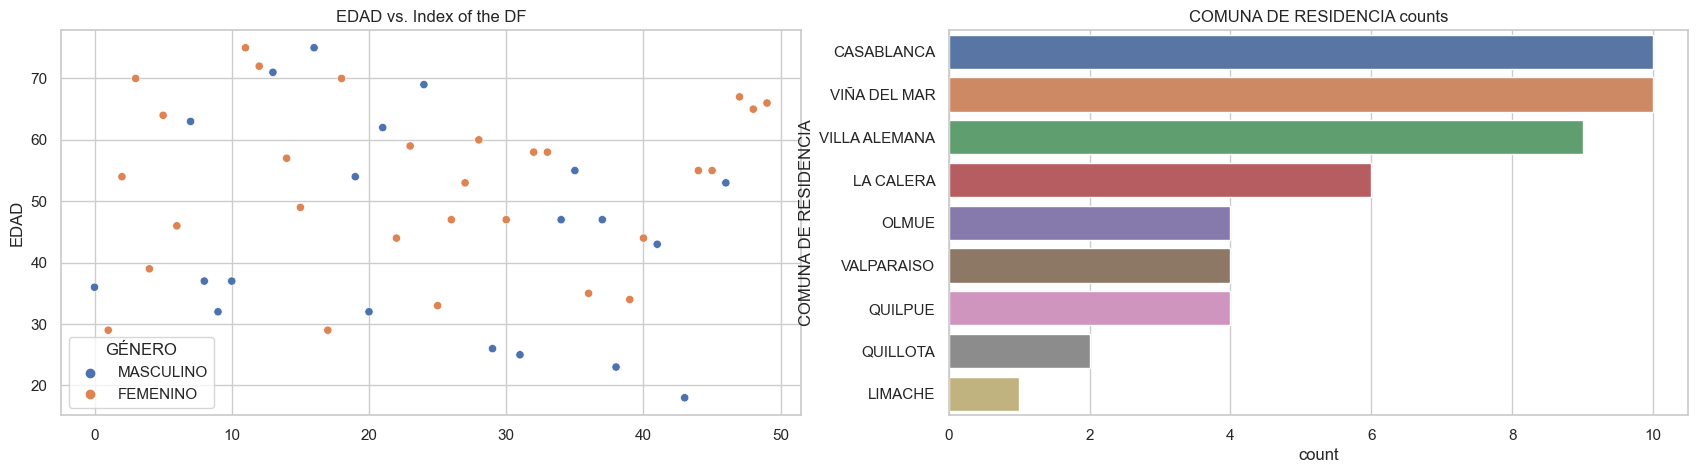

In [232]:
graph_df(df_set_1, "EDAD", "COMUNA DE RESIDENCIA")
graph_df(df_set_2, "EDAD", "COMUNA DE RESIDENCIA")
graph_df(df_set_3, "EDAD", "COMUNA DE RESIDENCIA")

In [ ]:
def calculate_stats(df, nombre_df):
    # revisar cuantos datos faltan por columna
    print(f"Número de datos nulos por atributo de {nombre_df}: \n")
    print(df.isnull().sum(axis = 0).sort_values(ascending=False))

    print()

    print("Cantidad de valores distintos por columna: \n")
    print(df.nunique().sort_values(ascending=False))

    print("Moda por columna: \n")

    modas_por_columna = {}

    for columna in df.columns:
        modas = df[columna].mode()
        modas_por_columna[columna] = list(modas) if not modas.empty else None

    print("Modas por columna:")
    print(modas_por_columna)
    print("\n\n")

calculate_stats(df_set_1, 'Set de Datos 1')
calculate_stats(df_set_2, 'Set de Datos 2')
calculate_stats(df_set_3, 'Set de Datos 3')

Número de datos nulos por atributo de Set de Datos 1: 

EDAD                    1
CANTIDAD DIAS           1
enc_genero              0
enc_act                 0
enc_comuna              0
enc_marca               0
enc_modelo              0
KILOMETRAJE INICIAL     0
KILOMETRAJE FINAL       0
MONTO                   0
COMUNA DE RESIDENCIA    0
GÉNERO                  0
dtype: int64

Cantidad de valores distintos por columna: 

KILOMETRAJE INICIAL     50
KILOMETRAJE FINAL       50
EDAD                    35
enc_modelo              19
MONTO                   15
enc_marca               13
enc_comuna               9
COMUNA DE RESIDENCIA     9
CANTIDAD DIAS            5
enc_act                  4
enc_genero               2
GÉNERO                   2
dtype: int64
Moda por columna: 

Modas por columna:
{'EDAD': [47.0], 'enc_genero': [0], 'enc_act': [0], 'enc_comuna': [0, 8], 'enc_marca': [4], 'enc_modelo': [2, 17], 'KILOMETRAJE INICIAL': [2197, 2200, 2220, 2233, 2329, 2344, 2417, 2471, 2542, 2732

In [ ]:
show_df_info(df_set_1)
show_df_info(df_set_2)
show_df_info(df_set_3)

,EDAD,enc_genero,enc_act,enc_comuna,enc_marca,enc_modelo,KILOMETRAJE INICIAL,KILOMETRAJE FINAL,CANTIDAD DIAS,MONTO
count,49.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,49.000000,5.000000e+01
mean,49.775510,0.400000,0.260000,4.300000,5.420000,9.880000,3216.580000,3342.980000,2.530612,2.912060e+05
std,15.260605,0.494872,0.664247,3.124949,3.417183,5.794579,590.127938,579.413197,1.385972,1.690145e+06
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2197.000000,2318.000000,1.000000,-2.000000e+04
25%,37.000000,0.000000,0.000000,1.000000,3.000000,5.000000,2770.500000,2871.250000,1.000000,2.000000e+04
50%,53.000000,0.000000,0.000000,5.000000,5.000000,11.000000,3200.500000,3333.000000,2.000000,4.500000e+04
75%,62.000000,1.000000,0.000000,7.000000,8.750000,15.000000,3645.750000,3774.500000,4.000000,8.000000e+04
max,75.000000,1.000000,3.000000,8.000000,12.000000,18.000000,4201.000000,4305.000000,5.000000,1.200000e+07


,EDAD,enc_genero,enc_act,enc_comuna,enc_marca,enc_modelo,KILOMETRAJE INICIAL,KILOMETRAJE FINAL,CANTIDAD DIAS,MONTO
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,45.600000,0.580000,0.920000,4.90000,7.120000,10.360000,3132.560000,3239.000000,2.940000,62400.000000
std,19.822683,0.537948,1.006915,2.60494,3.745147,4.964198,636.723378,647.680634,1.503873,49551.457484
min,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2172.000000,2221.000000,1.000000,0.000000
25%,30.250000,0.000000,0.000000,3.25000,4.000000,7.000000,2637.750000,2737.250000,2.000000,20000.000000
50%,46.000000,1.000000,0.500000,5.00000,8.500000,10.000000,3082.500000,3151.000000,3.000000,40000.000000
75%,58.000000,1.000000,2.000000,7.00000,10.000000,14.000000,3706.500000,3801.000000,4.000000,100000.000000
max,124.000000,2.000000,3.000000,9.00000,12.000000,19.000000,4213.000000,4305.000000,5.000000,150000.000000


,EDAD,enc_genero,enc_act,enc_comuna,enc_marca,enc_modelo,KILOMETRAJE INICIAL,KILOMETRAJE FINAL,CANTIDAD DIAS,MONTO
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,48.780000,1.52000,0.640000,4.640000,6.440000,8.680000,3176.980000,3291.080000,2.840000,9.540200e+04
std,16.770102,1.19932,0.920514,3.160728,3.850046,4.644242,522.549226,525.526474,1.503194,2.506898e+05
min,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2258.000000,2358.000000,1.000000,-2.000000e+04
25%,34.500000,0.00000,0.000000,2.000000,3.250000,5.250000,2791.250000,2924.000000,1.000000,2.000000e+04
50%,49.000000,1.50000,0.000000,5.000000,6.500000,8.000000,3195.000000,3266.000000,3.000000,5.000000e+04
75%,62.750000,3.00000,1.750000,7.750000,10.000000,12.000000,3624.250000,3745.250000,4.000000,9.000000e+04
max,75.000000,3.00000,3.000000,9.000000,12.000000,17.000000,4146.000000,4262.000000,5.000000,1.800000e+06
